<a href="https://colab.research.google.com/github/cristobalperezp/Desafio-Itau/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Desafío Banco Itaú
<h2 align="center">  Cristóbal Pérez
<h3 align="center"> 
<h3 align="center"> 2022

---

# Lectura de Datos

In [ ]:
# instalación de librerías y paquetes
! pip3 install squarify
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# configuración de gráficos
sns.set(
    context = 'notebook',
    style='whitegrid',
    palette = sns.color_palette("vlag")
    )
cmap = sns.color_palette("vlag", as_cmap=True)

In [ ]:
# setear el path
path_base = '/content/drive/MyDrive/Desafío Itaú'

In [ ]:
# lectura de datos
path = path_base+'/Bases de Datos/data.csv'
df = pd.read_csv(path)

# División de la Data

In [ ]:
df.head()

,Unnamed: 0,id,periodo,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,...,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo,aumento
0,231349,1,202208,74,0,685.667045,9,1136.363636,1136.363636,11352.039773,...,0.000000,5249.069318,25.0,22.0,2238.636364,6.033870e-01,0.000000,0.000000,0.00000,0.0
1,231350,2,202208,68,1,0.000000,4,6818.181818,41.572727,10.169318,...,1136.363636,681.818182,1.0,0.0,0.000000,0.000000e+00,6776.609091,0.993903,0.00000,0.0
2,231351,3,202208,74,1,511.363636,2,1022.727273,0.000000,0.000000,...,0.000000,7947.058034,2.0,0.0,2110.862161,5.000000e-01,1022.727273,1.000000,0.00000,0.0
3,231352,4,202208,80,0,1704.545455,4,0.000000,0.000000,0.000000,...,4096.864773,3469.013636,17.0,4.0,738.636364,0.000000e+00,0.000000,0.000000,0.09869,0.0
4,231353,5,202208,77,1,0.001136,4,7954.545455,2716.700000,583.101136,...,1136.363636,2772.020455,10.0,1.0,1135.607955,1.428571e-07,5237.845455,0.658472,0.00000,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'periodo', 'edad', 'sexo_1', 'renta', 'Q_prods',
       'TC_cupo', 'TC_saldo', 'CCTE_saldo', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo', 'aumento'],
      dtype='object')

In [ ]:
X_test = df.copy()
mask = X_test['periodo'] == 202208

X_test = df[mask]

In [ ]:
y_test = X_test['aumento']
X_test = X_test.drop(columns=['aumento','id','periodo','Unnamed: 0'])

In [ ]:
X = df.copy()
mask = X['periodo'] != 202208
X = X[mask]

X_train= X.drop(columns=['aumento','id','periodo','Unnamed: 0'])
y_train = X['aumento']

# Modelos Básicos

## Split y Escalar Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=12345,shuffle=True, stratify=y_train)

In [ ]:
import sklearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape

(35606, 17)

In [ ]:
y_resampled.value_counts()

0.0    17803
1.0    17803
Name: aumento, dtype: int64

In [ ]:
#! pip3 install xgboost

## Machine Learning

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import time
# create a default XGBoost classifier
xgb = XGBClassifier(n_estimators=1000, random_state=12345,clf__tree_method='gpu_hist')
# define the eval set and metric
eval_set = [(X_resampled, y_resampled), (X_val, y_val)]
eval_metric = ["auc","error"]
# fit the model
%time xgb.fit(X_resampled, y_resampled, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: user 1min 45s, sys: 939 ms, total: 1min 46s
Wall time: 1min 59s


XGBClassifier(clf__tree_method='gpu_hist', n_estimators=1000,
              random_state=12345)

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

In [ ]:
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_resampled)

In [ ]:
print('recall (train):',recall_score(y_resampled,y_pred_train))

print('recall (test):',recall_score(y_test,y_pred_test))

recall (train): 0.799696680334775
recall (test): 0.7528886554621849


In [ ]:
print('f1 score (train):',f1_score(y_resampled,y_pred_train))

print('f1 score (test):',f1_score(y_test,y_pred_test))

f1 score (train): 0.7677208875947046
f1 score (test): 0.06580895433313058


In [ ]:
print('accuracy (train):',accuracy_score(y_resampled,y_pred_train))

print('accuracy (test):',accuracy_score(y_test,y_pred_test))

accuracy (train): 0.7580463966747177
accuracy (test): 0.6482335400505629


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.78    227587
         1.0       0.03      0.75      0.07      3808

    accuracy                           0.65    231395
   macro avg       0.51      0.70      0.42    231395
weighted avg       0.98      0.65      0.77    231395



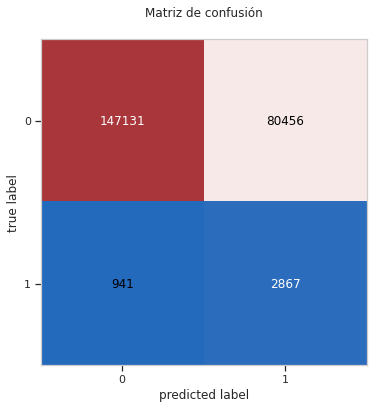

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,xgb.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
#Configure tuned_parameters
tuned_parameters = {
  #"learning_rate": [0.1, 0.01],
  #"colsample_bytree": [0.6, 0.8, 1.0],
  "n_estimators": [500,1000],
  "reg_lambda": [1, 1.5],
  "gamma": [0, 0.1]
}

#set scoring metric
score = 'f1_macro' 

clf = XGBClassifier(
    random_state=12345,
    clf__tree_method='gpu_hist' 
)

#Construir el clf con GridSearch
model = GridSearchCV(clf, 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)

#Entrenar clf
%time best_model = model.fit(X_resampled,y_resampled)

print("Mejor combinación de parámetros:")
print(best_model.best_params_)

CPU times: user 9min 59s, sys: 1.07 s, total: 10min
Wall time: 10min 3s
Mejor combinación de parámetros:
{'gamma': 0.1, 'n_estimators': 500, 'reg_lambda': 1}


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78    227587
         1.0       0.03      0.75      0.07      3808

    accuracy                           0.64    231395
   macro avg       0.51      0.70      0.42    231395
weighted avg       0.98      0.64      0.77    231395



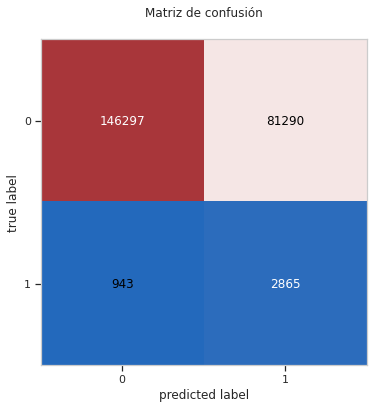

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,best_model.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=12345, n_estimators=1000)
%time rf.fit(X_resampled,y_resampled)

CPU times: user 1min 36s, sys: 612 ms, total: 1min 37s
Wall time: 1min 37s


RandomForestClassifier(n_estimators=1000, random_state=12345)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78    227587
         1.0       0.03      0.76      0.07      3808

    accuracy                           0.64    231395
   macro avg       0.51      0.70      0.42    231395
weighted avg       0.98      0.64      0.77    231395



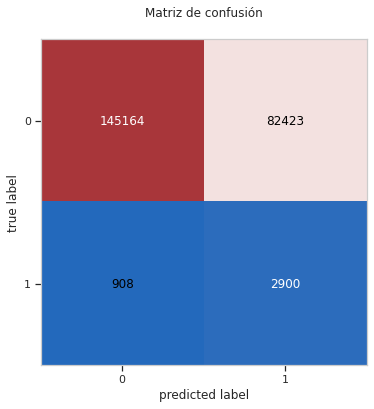

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rf.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
#Configure tuned_parameters
tuned_parameters = {
  #"learning_rate": [0.1, 0.01],
  #"colsample_bytree": [0.6, 0.8, 1.0],
  "min_samples_split": [4],
  "n_estimators": [300,500,1000],
  'max_depth' : [3,4,5]
}

#set scoring metric
score = 'f1_macro' 

clf = RandomForestClassifier(
    random_state=12345
)

#Construir el clf con GridSearch
model_rf = GridSearchCV(clf, 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)

#Entrenar clf
%time best_rf = model_rf.fit(X_resampled,y_resampled)

print("Mejor combinación de parámetros:")
print(best_rf.best_params_)

CPU times: user 10min 39s, sys: 1.12 s, total: 10min 40s
Wall time: 10min 40s
Mejor combinación de parámetros:
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 1000}


In [ ]:
recall max_depth': 3, 'min_samples_split': 4, 'n_estimators': 500
f1 {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 500}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.53      0.70    227587
         1.0       0.03      0.79      0.05      3808

    accuracy                           0.54    231395
   macro avg       0.51      0.66      0.37    231395
weighted avg       0.98      0.54      0.68    231395



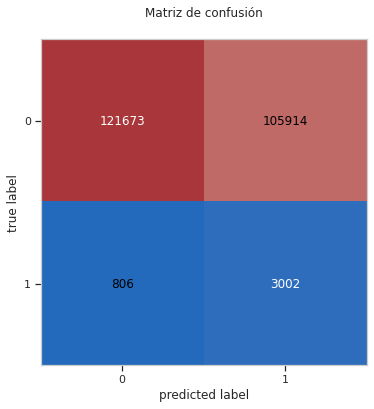

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,best_rf.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    random_state = 12345,
    max_depth = 5,
    min_samples_split = 4,
    n_estimators = 1000
)
%time model.fit(X_resampled, y_resampled)

CPU times: user 33.8 s, sys: 68.2 ms, total: 33.9 s
Wall time: 33.8 s


RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=1000,
                       random_state=12345)

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_resampled)

In [ ]:
print('recall (train):',recall_score(y_resampled,y_pred_train))

print('recall (test):',recall_score(y_test,y_pred_test))

recall (train): 0.7788574959276526
recall (test): 0.7883403361344538


In [ ]:
print('f1 score (train):',f1_score(y_resampled,y_pred_train))

print('f1 score (test):',f1_score(y_test,y_pred_test))

f1 score (train): 0.7021826100167113
f1 score (test): 0.05326283666299989


In [ ]:
print('accuracy (train):',accuracy_score(y_resampled,y_pred_train))

print('accuracy (test):',accuracy_score(y_test,y_pred_test))

accuracy (train): 0.6696624164466662
accuracy (test): 0.5387972946692885


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=12345)
dt.fit(X_resampled,y_resampled)

DecisionTreeClassifier(random_state=12345)

In [ ]:
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_resampled)

In [ ]:
print('recall (train):',recall_score(y_resampled,y_pred_train))

print('recall (test):',recall_score(y_test,y_pred_test))

recall (train): 0.999943829691625
recall (test): 0.6305147058823529


In [ ]:
print('f1 score (train):',f1_score(y_resampled,y_pred_train))

print('f1 score (test):',f1_score(y_test,y_pred_test))

f1 score (train): 0.9999719140570145
f1 score (test): 0.0518244315177155


In [ ]:
print('accuracy (train):',accuracy_score(y_resampled,y_pred_train))

print('accuracy (test):',accuracy_score(y_test,y_pred_test))

accuracy (train): 0.9999719148458125
accuracy (test): 0.620315910023985


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.62      0.76    227587
         1.0       0.03      0.63      0.05      3808

    accuracy                           0.62    231395
   macro avg       0.51      0.63      0.41    231395
weighted avg       0.97      0.62      0.75    231395



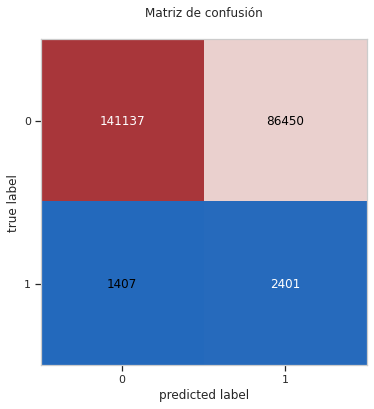

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,dt.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

### Logit

In [ ]:
from sklearn.linear_model import LogisticRegression
svc = LogisticRegression(random_state=12345)
%time svc.fit(X_resampled,y_resampled)

CPU times: user 381 ms, sys: 225 ms, total: 606 ms
Wall time: 329 ms


LogisticRegression(random_state=12345)

In [ ]:
y_pred_test = svc.predict(X_test)
y_pred_train = svc.predict(X_resampled)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.62      0.76    227587
         1.0       0.03      0.61      0.05      3808

    accuracy                           0.62    231395
   macro avg       0.51      0.61      0.41    231395
weighted avg       0.97      0.62      0.75    231395



In [ ]:
print('recall (train):',recall_score(y_resampled,y_pred_train))

print('recall (test):',recall_score(y_test,y_pred_test))

recall (train): 0.6138291299219233
recall (test): 0.6084558823529411


In [ ]:
print('f1 score (train):',f1_score(y_resampled,y_pred_train))

print('f1 score (test):',f1_score(y_test,y_pred_test))

f1 score (train): 0.6193957943660375
f1 score (test): 0.05021836427278737


In [ ]:
print('accuracy (train):',accuracy_score(y_resampled,y_pred_train))

print('accuracy (test):',accuracy_score(y_test,y_pred_test))

accuracy (train): 0.6228163792619221
accuracy (test): 0.6212407355387973


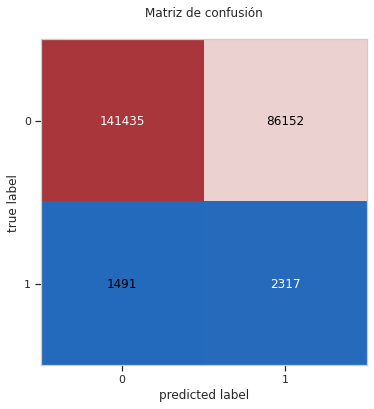

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,svc.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
%time knn.fit(X_resampled,y_resampled)

CPU times: user 6.15 ms, sys: 0 ns, total: 6.15 ms
Wall time: 8.93 ms


KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_resampled)

In [ ]:
print('recall (train):',recall_score(y_resampled,y_pred_train))

print('recall (test):',recall_score(y_test,y_pred_test))

recall (train): 0.608324439701174
recall (test): 0.46244747899159666


In [ ]:
print('f1 score (train):',f1_score(y_resampled,y_pred_train))

print('f1 score (test):',f1_score(y_test,y_pred_test))

f1 score (train): 0.7038180341186029
f1 score (test): 0.052093656170036536


In [ ]:
print('accuracy (train):',accuracy_score(y_resampled,y_pred_train))

print('accuracy (test):',accuracy_score(y_test,y_pred_test))

accuracy (train): 0.7440038195809695
accuracy (test): 0.7230406880010372


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84    227587
         1.0       0.03      0.46      0.05      3808

    accuracy                           0.72    231395
   macro avg       0.51      0.59      0.44    231395
weighted avg       0.97      0.72      0.82    231395



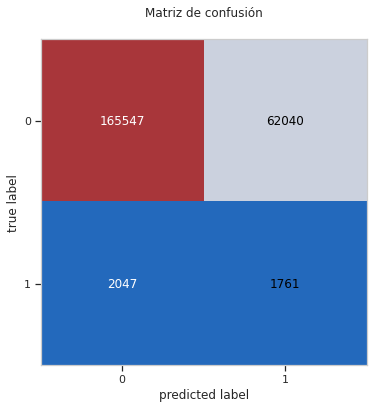

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,knn.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall


In [ ]:
165547+6204+2047+1761

175559

# Entrenamiento de la Red Neuronal con Descenso del Gradiente

### Confguración de la Red Neuronal

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
# CALLBACKS
callback_es = EarlyStopping(monitor='val_loss', patience=30)
callback_mc = ModelCheckpoint(path_base + '/models/' + 'best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-3,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
opt = SGD(learning_rate=0.001)

# METRICS
#metric = Precision()
metric = Recall()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# red neuronal feed forward
model = Sequential()
model.add(Dense(100, input_dim=17,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss=loss, optimizer=opt, metrics=[metric])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 80)                7280      
                                                                 
 dense_3 (Dense)             (None, 50)                4050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 22,271
Trainable params: 22,271
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [ ]:
max_epochs = 100
history = model.fit(X_resampled,y_resampled, epochs=max_epochs, validation_data=(X_val, y_val),batch_size=250, callbacks=[callback_es,callback_mc],verbose=1)

Epoch 1/100
143/143 [==============================] - 7s 28ms/step - loss: 0.7024 - recall: 0.1058 - val_loss: 0.6468 - val_recall: 0.1197
Epoch 2/100
143/143 [==============================] - 3s 18ms/step - loss: 0.7006 - recall: 0.1221 - val_loss: 0.6530 - val_recall: 0.1373
Epoch 3/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6990 - recall: 0.1450 - val_loss: 0.6579 - val_recall: 0.1546
Epoch 4/100
143/143 [==============================] - 3s 18ms/step - loss: 0.6977 - recall: 0.1663 - val_loss: 0.6619 - val_recall: 0.1779
Epoch 5/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6965 - recall: 0.1869 - val_loss: 0.6654 - val_recall: 0.2006
Epoch 6/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6954 - recall: 0.2137 - val_loss: 0.6681 - val_recall: 0.2314
Epoch 7/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6943 - recall: 0.2379 - val_loss: 0.6704 - val_recall: 0.2577
Epoch 8/100
143/143 

# Evaluación

In [ ]:
acc = history.history['recall']
test_acc = history.history['val_recall']

loss = history.history['loss']
test_loss = history.history['val_loss']

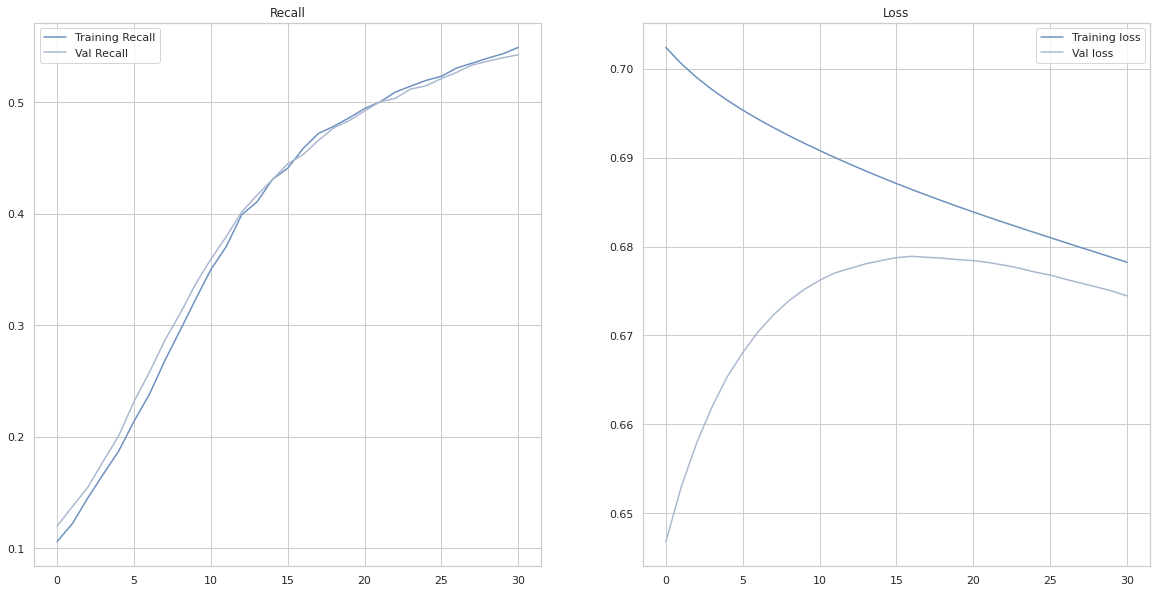

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Val Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Val loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 11s 1ms/step


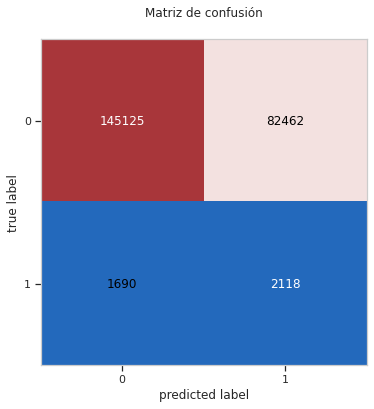

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

7232/7232 [==============================] - 19s 3ms/step - loss: 0.6762 - recall: 0.5562


[0.6762299537658691, 0.556197464466095]

In [ ]:
from tensorflow import keras
best_model = keras.models.load_model(path_base + '/models/' + 'best_model.hdf5')

In [ ]:
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 10s 1ms/step


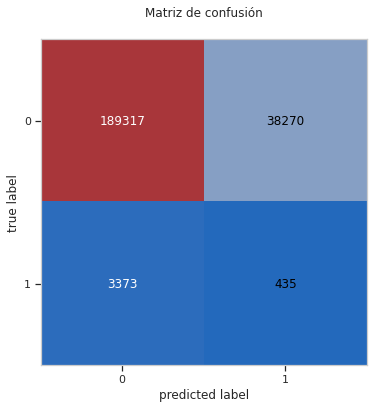

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

7232/7232 [==============================] - 20s 3ms/step - loss: 0.6462 - recall: 0.1142


[0.6462165713310242, 0.11423319578170776]

# Entrenamiento de Redes Neuronales con distintos Optimizadores

### Confguración de las Redes Neuronales

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta,Adagrad
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
# CALLBACKS
callback_es_1 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_1 = ModelCheckpoint(path_base + '/models/' + 'best_model_1.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callback_es_2 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_2 = ModelCheckpoint(path_base + '/models/' + 'best_model_2.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callback_es_3 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_3 = ModelCheckpoint(path_base + '/models/' + 'best_model_3.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
opt1 = Adam(learning_rate=1e-5)
opt2 = RMSprop(learning_rate=1e-5)
opt3 = Adagrad(learning_rate=1e-3)

# METRICS
#metric = Precision()
#metric = Recall()
metric = AUC()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_1 = Sequential()
model_1.add(Dense(100, input_dim=17,activation='relu'))
model_1.add(Dense(100,activation='relu'))
model_1.add(Dense(80,activation='relu'))
model_1.add(Dense(80,activation='relu'))
model_1.add(Dense(50,activation='relu'))
model_1.add(Dense(50,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

model_1.compile(loss=loss, optimizer=opt1, metrics=[metric])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 80)                8080      
                                                                 
 dense_3 (Dense)             (None, 80)                6480      
                                                                 
 dense_4 (Dense)             (None, 50)                4050      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [ ]:
model_2 = Sequential()
model_2.add(Dense(100, input_dim=17,activation='relu'))
model_2.add(Dense(100,activation='relu'))
model_2.add(Dense(80,activation='relu'))
model_2.add(Dense(80,activation='relu'))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

model_2.compile(loss=loss, optimizer=opt2, metrics=[metric])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               1800      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 80)                8080      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dense_11 (Dense)            (None, 50)                4050      
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
model_3 = Sequential()
model_3.add(Dense(100, input_dim=17,activation='relu'))
model_3.add(Dense(100,activation='relu'))
model_3.add(Dense(80,activation='relu'))
model_3.add(Dense(80,activation='relu'))
model_3.add(Dense(50,activation='relu'))
model_3.add(Dense(50,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

model_3.compile(loss=loss, optimizer=opt3, metrics=[metric])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1800      
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 80)                8080      
                                                                 
 dense_17 (Dense)            (None, 80)                6480      
                                                                 
 dense_18 (Dense)            (None, 50)                4050      
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 1)                

### Entrenamiento

#### Optimizador 1

In [ ]:
max_epochs = 100
history_1 = model_1.fit(X_resampled,y_resampled,  epochs=max_epochs, validation_data=(X_val, y_val),batch_size=250, callbacks=[callback_es_1,callback_mc_1],verbose=1)

Epoch 1/100
143/143 [==============================] - 7s 28ms/step - loss: 0.6946 - auc: 0.5195 - val_loss: 0.7357 - val_auc: 0.5538
Epoch 2/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6901 - auc: 0.5720 - val_loss: 0.7166 - val_auc: 0.5970
Epoch 3/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6868 - auc: 0.6087 - val_loss: 0.7087 - val_auc: 0.6242
Epoch 4/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6834 - auc: 0.6305 - val_loss: 0.7016 - val_auc: 0.6396
Epoch 5/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6796 - auc: 0.6445 - val_loss: 0.6974 - val_auc: 0.6501
Epoch 6/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6754 - auc: 0.6533 - val_loss: 0.6936 - val_auc: 0.6570
Epoch 7/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6708 - auc: 0.6599 - val_loss: 0.6885 - val_auc: 0.6619
Epoch 8/100
143/143 [==============================] - 3s 23ms

#### Optimizador 2

In [ ]:
max_epochs = 100
history_2 = model_2.fit(X_resampled,y_resampled,  epochs=max_epochs, validation_data=(X_val, y_val),batch_size=250, callbacks=[callback_es_2,callback_mc_2],verbose=1)

Epoch 1/100
143/143 [==============================] - 6s 33ms/step - loss: 0.6914 - auc: 0.6216 - val_loss: 0.7012 - val_auc: 0.5678
Epoch 2/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6887 - auc: 0.5908 - val_loss: 0.6973 - val_auc: 0.6064
Epoch 3/100
143/143 [==============================] - 3s 21ms/step - loss: 0.6859 - auc: 0.6228 - val_loss: 0.6943 - val_auc: 0.6305
Epoch 4/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6828 - auc: 0.6405 - val_loss: 0.6919 - val_auc: 0.6439
Epoch 5/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6793 - auc: 0.6515 - val_loss: 0.6893 - val_auc: 0.6533
Epoch 6/100
143/143 [==============================] - 3s 21ms/step - loss: 0.6755 - auc: 0.6587 - val_loss: 0.6869 - val_auc: 0.6599
Epoch 7/100
143/143 [==============================] - 3s 23ms/step - loss: 0.6715 - auc: 0.6631 - val_loss: 0.6826 - val_auc: 0.6645
Epoch 8/100
143/143 [==============================] - 3s 23ms

#### Optimizador 3

In [ ]:
max_epochs = 100
history_3 = model_3.fit(X_resampled,y_resampled,  epochs=max_epochs, validation_data=(X_val, y_val),batch_size=250, callbacks=[callback_es_3,callback_mc_3],verbose=1)

Epoch 1/100
143/143 [==============================] - 5s 28ms/step - loss: 0.6955 - auc_1: 0.4608 - val_loss: 0.7175 - val_auc_1: 0.4672
Epoch 2/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6942 - auc_1: 0.4804 - val_loss: 0.7097 - val_auc_1: 0.4876
Epoch 3/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6933 - auc_1: 0.5010 - val_loss: 0.7041 - val_auc_1: 0.5091
Epoch 4/100
143/143 [==============================] - 3s 20ms/step - loss: 0.6926 - auc_1: 0.5232 - val_loss: 0.6997 - val_auc_1: 0.5301
Epoch 5/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6920 - auc_1: 0.5423 - val_loss: 0.6962 - val_auc_1: 0.5466
Epoch 6/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6914 - auc_1: 0.5607 - val_loss: 0.6936 - val_auc_1: 0.5652
Epoch 7/100
143/143 [==============================] - 3s 22ms/step - loss: 0.6909 - auc_1: 0.5759 - val_loss: 0.6914 - val_auc_1: 0.5793
Epoch 8/100
143/143 [=============

# Evaluación de Redes Neuronales con distintos Optimizadores

## Evaluación Optimizador: Adam

In [ ]:
acc = history_1.history['auc']
test_acc = history_1.history['val_auc']

loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

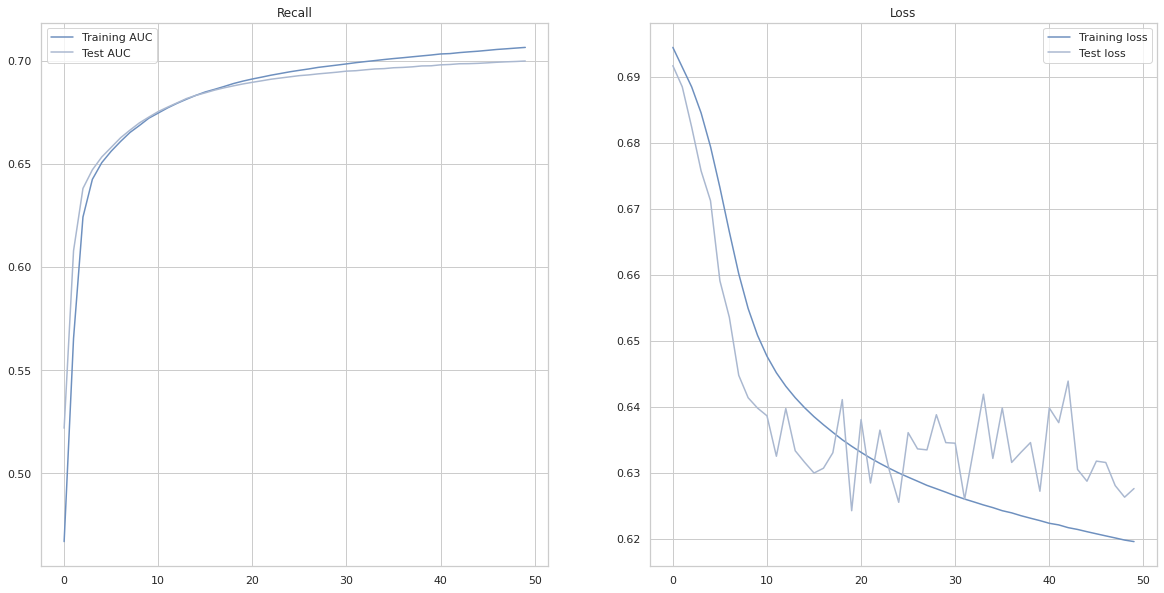

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training AUC')
ax1.plot(range(n_epochs), test_acc, label='Test AUC')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
y_pred = model_1.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 11s 1ms/step


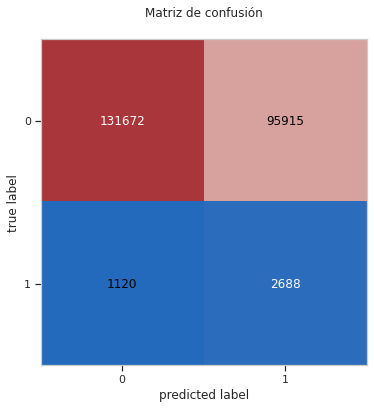

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model_1.evaluate(X_test, y_test)

7232/7232 [==============================] - 20s 3ms/step - loss: 0.6412 - auc: 0.6897


[0.6411904096603394, 0.6896510124206543]

In [ ]:
from tensorflow import keras
best_model_1 = keras.models.load_model(path_base + '/models/' + 'best_model_1.hdf5')

In [ ]:
y_pred_train = best_model_1.predict(X_resampled)
y_pred_train = np.round(y_pred_train)

1113/1113 [==============================] - 2s 2ms/step


In [ ]:
y_pred_test = best_model_1.predict(X_test)
y_pred_test = np.round(y_pred_test)

7232/7232 [==============================] - 11s 2ms/step


In [ ]:
print('recall (train):',recall_score(y_resampled,y_pred_train))

print('recall (test):',recall_score(y_test,y_pred_test))

recall (train): 0.7094309947761613
recall (test): 0.7053571428571429


In [ ]:
print('f1 score (train):',f1_score(y_resampled,y_pred_train))

print('f1 score (test):',f1_score(y_test,y_pred_test))

f1 score (train): 0.678102601272449
f1 score (test): 0.05381848783273391


In [ ]:
print('accuracy (train):',accuracy_score(y_resampled,y_pred_train))

print('accuracy (test):',accuracy_score(y_test,y_pred_test))

accuracy (train): 0.6632309161377296
accuracy (test): 0.5918451133343418


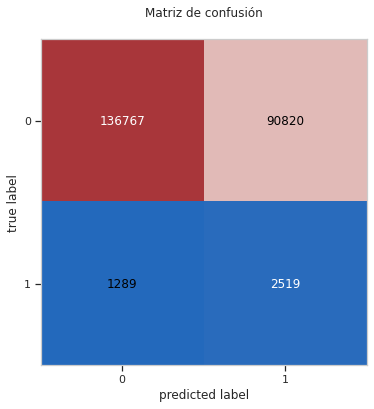

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model_1.evaluate(X_test, y_test)

7232/7232 [==============================] - 20s 3ms/step - loss: 0.6356 - auc: 0.6774


[0.6356483697891235, 0.6774324178695679]

## Evaluación Optimizador: RMSprop

In [ ]:
acc = history_2.history['auc']
test_acc = history_2.history['val_auc']

loss = history_2.history['loss']
test_loss = history_2.history['val_loss']

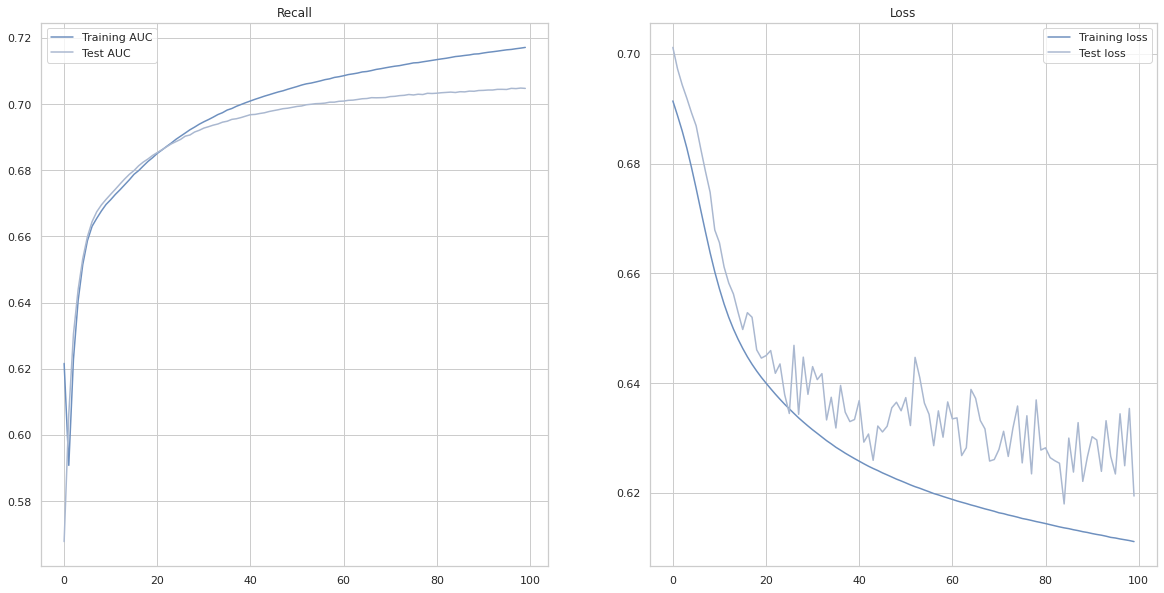

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training AUC')
ax1.plot(range(n_epochs), test_acc, label='Test AUC')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 11s 1ms/step


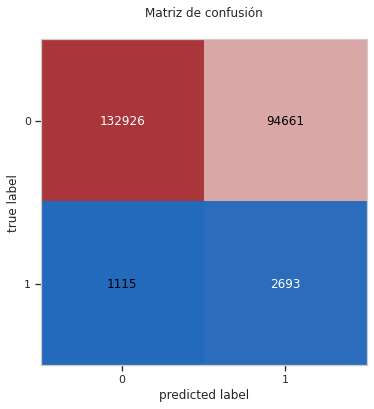

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model_2.evaluate(X_test, y_test)

7232/7232 [==============================] - 20s 3ms/step - loss: 0.6332 - auc: 0.6953


[0.633213996887207, 0.6952909231185913]

In [ ]:
from tensorflow import keras
best_model_2 = keras.models.load_model(path_base + '/models/' + 'best_model_2.hdf5')

In [ ]:
y_pred = best_model_2.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 11s 2ms/step


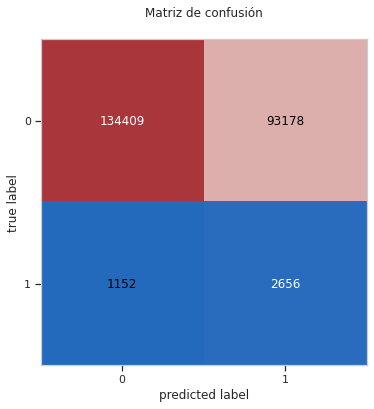

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model_2.evaluate(X_test, y_test)

7232/7232 [==============================] - 20s 3ms/step - loss: 0.6318 - auc: 0.6936


[0.6318410634994507, 0.6935734748840332]

## Evaluación Optimizador: Adagrad

In [ ]:
acc = history_3.history['auc_1']
test_acc = history_3.history['val_auc_1']

loss = history_3.history['loss']
test_loss = history_3.history['val_loss']

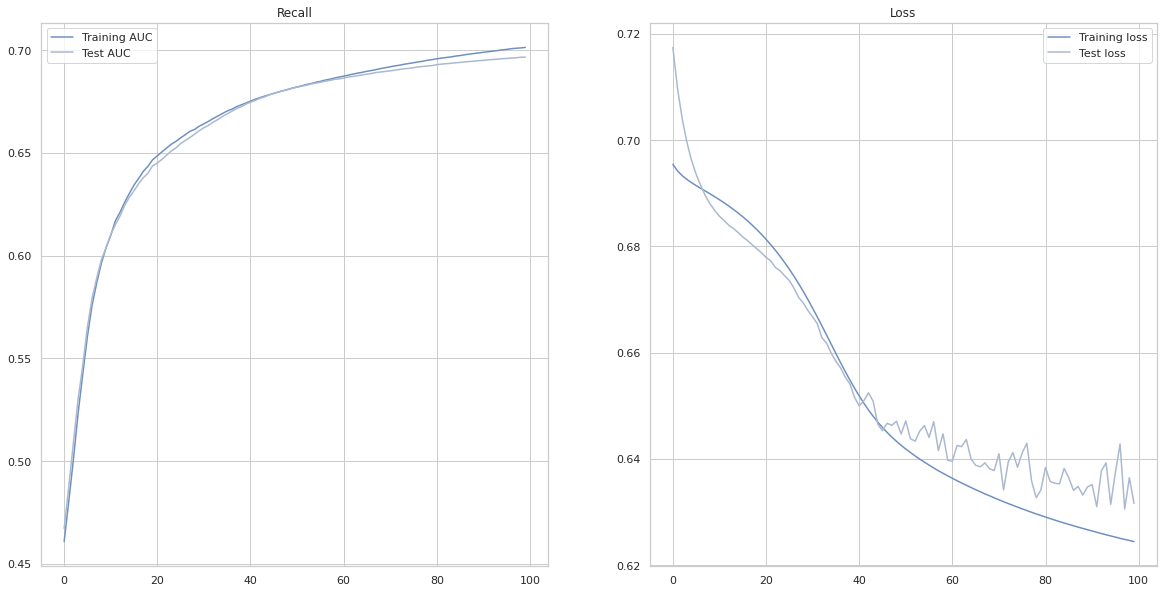

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training AUC')
ax1.plot(range(n_epochs), test_acc, label='Test AUC')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
y_pred = model_3.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 11s 1ms/step


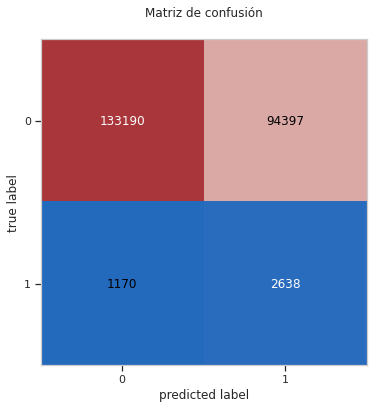

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model_3.evaluate(X_test, y_test)

7232/7232 [==============================] - 21s 3ms/step - loss: 0.6443 - auc_1: 0.6869


[0.6443319320678711, 0.6868895888328552]

In [ ]:
from tensorflow import keras
best_model_3 = keras.models.load_model(path_base + '/models/' + 'best_model_3.hdf5')

In [ ]:
y_pred = best_model_3.predict(X_test)
y_pred = np.round(y_pred)

7232/7232 [==============================] - 11s 1ms/step


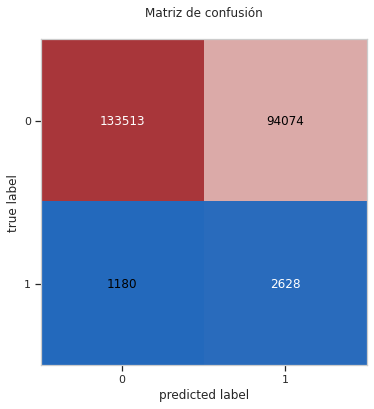

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model_3.evaluate(X_test, y_test)

7232/7232 [==============================] - 21s 3ms/step - loss: 0.6432 - auc_1: 0.6866


[0.6431981325149536, 0.686583936214447]

# Resumen de Desempeño de las Redes Neuronales

In [ ]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2197 - recall: 0.7984


[0.21974854171276093, 0.7983871102333069]

In [ ]:
best_model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2209 - recall_1: 0.8226


[0.2209259271621704, 0.8225806355476379]

In [ ]:
best_model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2128 - recall_1: 0.7903


[0.21276859939098358, 0.7903226017951965]

In [ ]:
best_model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2272 - recall_1: 0.7903


[0.2272183746099472, 0.7903226017951965]